In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as ltb
from xgboost import XGBRegressor
from scipy.stats import loguniform

In [2]:
X_test = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_CHD')
X_train = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_CHD')
y_test = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_CHD')
y_train = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_CHD')
X_train.head()

,CensusTract,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,32003002961,7.020828,55.534960,0.707527,33.105706,0.500187,486.697724,0.025327,0.004882,0.247426,2.158112,0.000320
1,18097310204,9.312653,44.314528,0.672713,29.201408,0.403984,291.741826,0.063946,0.109321,1.963273,3.805254,0.000000
2,48453001308,9.493040,41.367930,0.583178,33.950504,0.445061,1831.637602,0.218243,0.013989,0.588443,2.407028,0.000001
3,15009030301,0.000000,0.000000,0.011847,8.431591,0.083764,20.472961,0.168402,0.005390,0.178587,0.254276,0.000000
4,6111000200,8.453749,57.221836,0.152667,31.823667,0.477272,331.674424,0.359829,0.105408,0.400620,0.071656,0.930880


In [3]:
X_test.set_index('CensusTract', inplace=True)
X_train.set_index('CensusTract', inplace=True)



In [4]:
print(y_test.shape, y_train.shape)
y_test

(18081, 2) (54242, 2)


,CensusTract,CHD_prevalence
0,9009352200,5.4
1,48041002008,2.8
2,44007003400,5.5
3,12063210700,8.4
4,49035104800,4.6
...,...,...
18076,17119401800,6.9
18077,39031961800,8.3
18078,24003751400,5.8
18079,40027200900,6.2


In [5]:
y_train.set_index('CensusTract', inplace=True)
y_test.set_index('CensusTract', inplace=True)

In [6]:
print(y_test.shape, y_train.shape)

(18081, 1) (54242, 1)


In [7]:
y_test = np.array(y_test).reshape(18081,)
y_train = np.array(y_train).reshape(54242,)

In [8]:
y_train.shape

(54242,)

In [9]:
y_test.shape

(18081,)

In [10]:
X_test.head()

,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,
9009352200,6.291751,41.915988,0.302711,24.420429,0.294255,563.983484,0.258325,0.173061,1.146023,5.043078,3.903335e-03
48041002008,9.182470,38.962434,0.228004,29.861112,0.367138,173.164660,0.014555,0.024351,0.166202,0.093085,3.863518e-04
44007003400,6.604577,41.231211,0.759534,28.352641,0.391471,303.781539,0.845357,0.121500,2.104873,7.786157,6.471390e-02
12063210700,8.798446,33.448105,0.184947,39.594528,0.644909,3.664454,0.055698,0.092298,0.021347,0.024374,1.998896e-07
49035104800,8.035998,58.437563,1.016994,27.476398,0.420871,390.951568,0.647649,0.237613,0.698240,1.510871,5.081597e+00


In the pre-processeing notebook, I have already done multiple OLS on the data and found no reasonable correlation. In this notebook, the first type of model I will use will be random forest.

In [12]:
# Instantiate RandomForestRegressor 
rf = RandomForestRegressor() 
rf.fit(X_train, y_train)

RandomForestRegressor()

In [13]:
y_pred = rf.predict(X_test)

In [14]:
print('R2 score:', r2_score(y_test, y_pred)  )
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5105070093926436
MAE: 0.9819423151374371
MSE: 1.9633379042641443
RMSE: 1.4011916015535293


In [12]:
params = {'n_estimators': sp_randInt(1,500), 'max_depth':sp_randInt(1,30)}
 
rs = RandomizedSearchCV(rf, params)

In [13]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x14dbcdd90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x14dbd30a0>})

In [14]:
rs.best_estimator_

RandomForestRegressor(max_depth=26, n_estimators=382)

In [15]:
rf = RandomForestRegressor(max_depth=26, n_estimators=382)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=26, n_estimators=382)

In [16]:
y_pred = rf.predict(X_test)

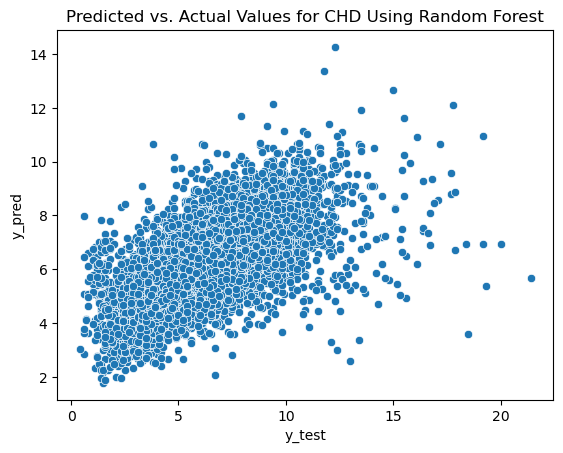

In [17]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title('Predicted vs. Actual Values for CHD Using Random Forest')
_ = ax.set_xlabel('y_test')
_ = ax.set_ylabel('y_pred')

In [18]:
print('R2 score:', r2_score(y_test, y_pred)  )
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5152501605249782
MAE: 0.9773987107553448
MSE: 1.9443133041524838
RMSE: 1.3943863539752832



These metrics show that this is a mediocre model.

In [16]:
# Instantiating AdaBoostRegressor and fitting it to the training data
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

AdaBoostRegressor()

In [17]:
y_pred = ada.predict(X_test)

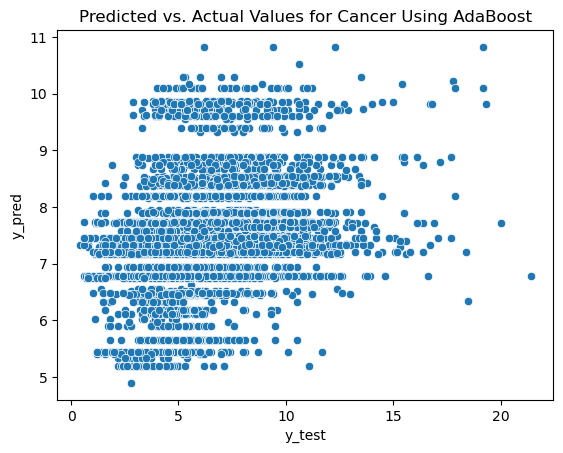

In [18]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title('Predicted vs. Actual Values for Cancer Using AdaBoost')
_ = ax.set_xlabel('y_test')
_ = ax.set_ylabel('y_pred')

In [19]:
print('R2 score:', r2_score(y_test, y_pred)  )
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: -0.25876254735782944
MAE: 1.8155357700242594
MSE: 5.04884905221884
RMSE: 2.2469644083115425


Since Adaboost with the default hyperparameters is not giving reasonable results, the next step will be to search for the best hyperparameters.

In [20]:
# Instantiate AdaBoost Regressor and randomly search for best hyperparameters n_estimators and learning rate
ada = AdaBoostRegressor()
params = {'n_estimators': sp_randInt(1,500), 'learning_rate':sp_randFloat(1e-3,100)}

rs = RandomizedSearchCV(ada, params)

In [21]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x15db6f2b0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x15db61ac0>})

In [22]:
rs.best_estimator_

AdaBoostRegressor(learning_rate=22.290900339427473, n_estimators=195)

In [23]:
ada = AdaBoostRegressor(learning_rate=22.290900339427473, n_estimators=195)
ada.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=22.290900339427473, n_estimators=195)

In [24]:
y_pred = ada.predict(X_test)

In [25]:
print('R2 score:', r2_score(y_test, y_pred)  )
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: -199.86426948297324
MAE: 28.31338974614236
MSE: 805.6590011614403
RMSE: 28.38413291191824


This just made the results worse. Next will be Gradient Boost Regressor.

In [26]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [27]:
y_pred = gb.predict(X_test)

In [28]:
print('R2 score:', r2_score(y_test, y_pred)  )
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.36423167267751977
MAE: 1.1504687282794421
MSE: 2.550042757127235
RMSE: 1.5968853299868575


Now with randomly tuned hyperparameters.

In [45]:
# Randomly search for best hyperparameters n_estimators and learning rate
gb = GradientBoostingRegressor()
params = {'n_estimators': [1, 2, 5, 10, 20, 50, 100, 200, 500], 'max_leaf_nodes': [2, 5, 10, 20, 50, 100], 'learning_rate': loguniform(0.01, 1)}

rs = RandomizedSearchCV(gb, params)

In [46]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x15dbe8b20>,
                                        'max_leaf_nodes': [2, 5, 10, 20, 50,
                                                           100],
                                        'n_estimators': [1, 2, 5, 10, 20, 50,
                                                         100, 200, 500]})

In [53]:
rs.best_estimator_

RandomForestRegressor(max_depth=29, n_estimators=416)

In [48]:
gb = GradientBoostingRegressor(learning_rate=0.12117251016429992, max_leaf_nodes=100,
                          n_estimators=200)
gb.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.12117251016429992, max_leaf_nodes=100,
                          n_estimators=200)

In [49]:
y_pred = gb.predict(X_test)

In [50]:
print('R2 score:', r2_score(y_test, y_pred)  )
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.39840776735743
MAE: 1.110939657295109
MSE: 2.412963731702311
RMSE: 1.5533717300447794


The tuning did not make much of a difference, and still not as good as Random Forest. Next model will be XGBoost.

In [29]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [30]:
y_pred = xgb.predict(X_test)

In [31]:
print('R2 score:', r2_score(y_test, y_pred)  )
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.4621647120849809
MAE: 1.03958963090541
MSE: 2.1572370335766498
RMSE: 1.4687535646175125


This is still not as good as Random Forest, so I will do hyperparameter tuning on max_depth, min_child_weight, and gamma.

In [32]:
# Instantiate XGBRegressor Regressor and randomly search for best hyperparameters max_depth, min_child_weight, and gamma.
xgb = XGBRegressor()
params = {'max_depth': sp_randInt(1,200), 'min_child_weight':sp_randInt(1,200), 'gamma':sp_randInt(1,200)}

rs = RandomizedSearchCV(xgb, params)

In [33]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x15dbe6040>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x15dbe60d0>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x15dbe8640>})

In [34]:
rs.best_params_

{'gamma': 24, 'max_depth': 25, 'min_child_weight': 29}

In [35]:
xgb = XGBRegressor(gamma=24, max_depth=25, min_child_weight=29)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=24, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=25, max_leaves=None,
             min_child_weight=29, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [36]:
y_pred = xgb.predict(X_test)

In [37]:
print('R2 score:', r2_score(y_test, y_pred)  )
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.48729529468640553
MAE: 1.0203716008169095
MSE: 2.056439215580527
RMSE: 1.4340290149019046


This is slightly better than XGBoost without tuning the hyperparameters, but it is still not as good as Random Forest. I will try LightGBM.

In [38]:
lgbm = ltb.LGBMRegressor()
params = {'reg_alpha': sp_randFloat(1e-3,100), 'reg_lambda': sp_randFloat(1e-3,100)}

rs = RandomizedSearchCV(lgbm, params)

In [39]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=LGBMRegressor(),
                   param_distributions={'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x15dbe8370>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x15dbf8b20>})

In [40]:
rs.best_estimator_

LGBMRegressor(reg_alpha=21.555960793638025, reg_lambda=32.30155795773226)

In [41]:
lgbm = ltb.LGBMRegressor(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, reg_alpha=21.555960793638025, reg_lambda=32.30155795773226)
lgbm.fit(X_train, y_train) 

LGBMRegressor(reg_alpha=21.555960793638025, reg_lambda=32.30155795773226)

In [42]:
y_pred = lgbm.predict(X_test)

In [43]:
print('R2 score:', r2_score(y_test, y_pred)  )
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.4482176744143027
MAE: 1.0571207966919116
MSE: 2.2131780750960925
RMSE: 1.4876753930532334


This is not as good as XGBoost

The next model I will try is a support vector machine regressor.

In [81]:
# Importing normalized data
X_test_log = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_log_CHD')
X_train_log = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_log_CHD')
y_test_log = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_log_CHD')
y_train_log = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_log_CHD')
X_train_log.head()

,CensusTract,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF
0,32003002961,7.020828,55.534960,0.917367,0.287083,0.530685,0.344931,-1.293792,-1.380519,0.247426,0.507938
1,18097310204,9.312653,44.314528,0.839156,-0.128422,-0.115502,0.054532,-1.041797,0.462086,1.963273,0.927542
2,48453001308,9.493040,41.367930,0.615746,0.371394,0.170443,1.201532,-0.211880,-1.151121,0.588443,0.592208
3,15009030301,0.000000,0.000000,-2.295210,-3.831500,-3.047175,-1.148260,-0.453107,-1.367256,0.178587,-0.916296
4,6111000200,8.453749,57.221836,-1.199415,0.155523,0.384052,0.125365,0.366184,0.416839,0.400620,-1.252648


In [82]:
X_train_log.set_index('CensusTract')
X_test_log.set_index('CensusTract')
print(X_train_log.shape, X_test_log.shape)

(54242, 11) (18081, 11)


In [83]:
print(y_train_log.shape, y_test_log.shape)
print(y_train_log.head())

(54242, 2) (18081, 2)
   Unnamed: 0         0
0           0  0.753435
1           1 -0.674186
2           2 -1.456287
3           3 -0.289581
4           4 -0.506651


In [84]:
y_train_log.drop('Unnamed: 0', axis=1, inplace=True)
y_test_log.drop('Unnamed: 0', axis=1, inplace=True)
print(y_train_log.shape, y_test_log.shape)

(54242, 1) (18081, 1)


In [85]:
y_train_log = np.array(y_train_log)
y_train_log = y_train_log.ravel()
y_test_log = np.array(y_test_log)
y_test_log = y_test_log.ravel()
print(y_train_log.shape, y_test_log.shape)

(54242,) (18081,)


In [86]:
# Instantiate support vector machine regressor and randomly search for best hyperparameters C and epsilon.
svm = SVR()
params = {'C': sp_randFloat(.01,10), 'epsilon':sp_randFloat(1e-4,10)}

svm_rs = RandomizedSearchCV(svm, params)

In [87]:
svm_rs.fit(X_train_log, y_train_log)

RandomizedSearchCV(estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1693a2940>,
                                        'epsilon': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1693af520>})

In [88]:
svm_rs.best_estimator_

SVR(C=8.915292244200284, epsilon=2.846573570110612)

In [89]:
svm = SVR(C=8.915292244200284, epsilon=2.846573570110612)
svm.fit(X_train_log, y_train_log)

SVR(C=8.915292244200284, epsilon=2.846573570110612)

In [90]:
y_pred_log = svm.predict(X_test_log)

In [91]:
print('R2 score:', r2_score(y_test_log, y_pred_log)  )
print('MAE:', mean_absolute_error(y_test_log, y_pred_log))
print('MSE:', mean_squared_error(y_test_log, y_pred_log))
print('RMSE:', np.sqrt(mean_squared_error(y_test_log, y_pred_log)))

R2 score: -0.07616299804767879
MAE: 0.8346826553904853
MSE: 1.1068647564815008
RMSE: 1.0520764023974214


Since the R2 value is negative, SVM is not a reasonable model for this data.